# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Introducción

En este proyecto analizaremos los factores que influyen en la variedad de los precios de los vehículos publicados. Verificaremos el estado del dataset obtenido. Si tenemos datos faltantes, los llenamos con nuestro analisis o bien, si no nos causa problemas mayores, los podríamos eliminar. Si tenemos datos de tipos diferentes a los necesitados, los corregiremos. Así podemos tener una base de datos completa y limpia para poder proseguir con el análisis.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode


### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    cars = pd.read_csv('vehicles_us.csv')
except:
    cars = pd.read_csv('/datasets/vehicles_us.csv')

cars_original = cars.copy()


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [3]:
# imprime la información general/resumida sobre el DataFrame
cars.info()
print()
print(cars.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

(51525, 13)


In [4]:
# imprimir una muestra de datos

print(cars.head())
print('*--------------------------------------------------------------------------------------------*')
print(cars.tail())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
*--------------------------------------------------------------------------------------------*
       price  model_ye

<font color=green>
Al explorar nuestro DataFrame, observamos que tenemos 51525 filas y 13 columnas, junto a lo siguiente:


- `model_year` : tenemos valores faltantes y a su vez están como tipo float64, pudiendo ser int.

- `cylinders` : tenemos valores faltantes y también como tipo float64. No influye mucho. Se podría dejar como int quizás.

- `odometer` : tenemos valores faltantes.

- `paint_color` : tenemos valores faltantes.
    
- `is_4wd` : tenemos valores faltantes. Podrá ser que los faltantes NO sean 4WD y se podrían cambiar a valor 0 como False, tomando en cuenta que el 1 como True
    
- `date_posted` : tenemos fecha en formato object, conveniendo transformarlo en Datetime mejor.

    
En `model`, `condition`, `fuel`, `transmission`,`type`, `paint_color` podríamos verificar si está todo bien escrito o duplicado, sino cambiarlo a una forma más uniforme (todo minúscula, por ejemplo) o una descripción universal.    
    
   
   
        
</font>

In [5]:
print(f'Cantidad de faltantes en columna "is_4wd":', cars['is_4wd'].isna().sum(),
      f'Corresponde a:', int(((cars['is_4wd']).isna().sum())*100/len(cars)),'%')

print(f'Cantidad de faltantes en columna "paint_color":', cars['paint_color'].isna().sum(),
      f'Corresponde a:', int(((cars['paint_color']).isna().sum())*100/len(cars)),'%')

print(f'Cantidad de faltantes en columna "odometer":', cars['odometer'].isna().sum(),
      f'Corresponde a:', int(((cars['odometer']).isna().sum())*100/len(cars)),'%')

print(f'Cantidad de faltantes en columna "cylinders":', cars['cylinders'].isna().sum(),
      f'Corresponde a:', int(((cars['cylinders']).isna().sum())*100/len(cars)),'%')

print(f'Cantidad de faltantes en columna "model_year":', cars['model_year'].isna().sum(),
      f'Corresponde a:', int(((cars['model_year']).isna().sum())*100/len(cars)),'%')



Cantidad de faltantes en columna "is_4wd": 25953 Corresponde a: 50 %
Cantidad de faltantes en columna "paint_color": 9267 Corresponde a: 17 %
Cantidad de faltantes en columna "odometer": 7892 Corresponde a: 15 %
Cantidad de faltantes en columna "cylinders": 5260 Corresponde a: 10 %
Cantidad de faltantes en columna "model_year": 3619 Corresponde a: 7 %


### Conclusiones y siguientes pasos


<font color=green>
Al observar, nos falta un 50% en la columna "is_4d". Ésta columna no debiese ser difícil de corregir, como anteriormente mencionado, deben ser valores booleanos y los NAN corresponder a 0 y que no tengan 4wd.
    
Después tenemos las columnas "paint_color" y "odometer". El "paint_color" no es una solución fácil, ya que debemos seguir analizando para tomar una buena decisión en reemplazar los valores ausentes. La columna "odometer", podríamos analizar su distribución estadística y así tomar una decisión con qué valores reemplazar los faltantes, ya que superan el 10% como para deshecharlos.
    
Además tenemos las dos columnas "cylinders" y "model_year", las cuales también debemos analizar para poder llenar los valores ausentes si es posible.
    
También crearemos una nueva columna para lo que es condición y poder categorizarlo en números y no strings. 
    
</font>

## Tratar los valores ausentes (si hay)

<font color=purple>
 Columna "is_4wd"   
    
</font>

In [6]:
#Reemplazamos los NaN con un 0

cars['is_4wd'] = cars['is_4wd'].fillna(0)

#comprobamos si efectivamente ya no haya NaN
cars['is_4wd'].isna().sum()

0

<font color=purple>
 Columna "cylinders"   
    
</font>

In [7]:
#Veamos la cantidad de autos por cilindros
cars.groupby('cylinders')['model'].count()

cylinders
3.0        34
4.0     13864
5.0       272
6.0     15700
8.0     15844
10.0      549
12.0        2
Name: model, dtype: int64

In [8]:
#haremos una tabla más bonita con el detalle completo:

number_cylinder = cars.pivot_table(columns='model', values='cylinders', aggfunc='median')
number_cylinder

#number_cylinder = cars.pivot_table(index='model', values='cylinders', aggfunc='median')
#number_cylinder

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
cylinders,6.0,6.0,6.0,8.0,6.0,6.0,5.0,8.0,4.0,4.0,...,4.0,4.0,6.0,4.0,4.0,6.0,6.0,8.0,4.0,4.0


6

In [9]:
def cylinder_fill (x):
    model = x['model']
    try:
        return float(number_cylinder[model]['cylinders'])
    except:
        return np.nan

In [10]:
#comprobamos que funcione la función
number_cylinder['buick enclave']['cylinders']

6.0

In [11]:
cars['cylinders_new'] = cars.apply(cylinder_fill, axis=1)

In [12]:
cars['cylinders'] = cars['cylinders'].fillna(cars['cylinders_new'])


In [13]:
cars = cars.drop(['cylinders_new'], axis=1)

In [14]:
#verificamos que no haya dato faltante

cars['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<font color=purple>
    Columna "odometer"
</font>

In [16]:
cars['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

<font color=green>
    Observamos que tenemos vehículos con 0 millas
</font>

In [17]:
#verificamos cuánto es el % de estos vehículos 0 millas
print(len(cars[cars['odometer']== 0])*100/len(cars))

print('--------------------------------')

cars['odometer'].isna().sum()


0.35904900533721495
--------------------------------


7892

In [18]:
number_odo = cars.pivot_table(columns='condition', values = 'odometer', aggfunc='mean')
number_odo

#number_odo = cars.pivot_table(index='condition', values = 'odometer', aggfunc='mean')
#number_odo

condition,excellent,fair,good,like new,new,salvage
odometer,106687.682258,183062.233577,129919.93098,79426.738166,43476.056,140919.989796


<font color=green>
Podemos apreciar que la calidad es catalogada por la cantidad de millas que tiene el vehículo.
</font>

In [19]:
def odometer_fill (y):
    condition = y['condition']
    try:
        return float(number_odo[condition]['odometer'])
    except:
        return np.nan

In [20]:
#probamos la función:
number_odo['fair']['odometer']

183062.23357664235

In [21]:
#creamos una nueva columna y aplicamos la función al DataFrame


cars['odometer_new'] = cars.apply(odometer_fill, axis=1)



In [22]:
#Rellenamos los datos en la columna correspondiente del DataFrame
cars['odometer'] = cars['odometer'].fillna(cars['odometer_new'])

In [23]:
#Eliminamos la columna nueva creada
cars = cars.drop(['odometer_new'], axis=1)

In [24]:
#Verificamos si aún hay datos faltantes en la columna
#len(cars[cars['odometer'].isna()])
cars['condition'].isna().sum()
print()
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<font color=green>
    Los datos faltantes de la columna 'odometer' han sido rellenados con datos medios equivalentes al estado del vehículo.
</font>

<font color=purple>
    Columna "model_year"
</font>

In [25]:
table_model_year = cars.pivot_table(columns='model', values = 'model_year', aggfunc='mean')
table_model_year

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
model_year,2007.517857,2008.99187,2012.194553,2008.508475,2008.397959,2015.887372,2012.507576,1996.857759,2014.142523,2013.163004,...,2007.829268,2010.148581,2008.827476,2009.553812,2009.74463,2008.584416,2009.331599,2009.350352,2010.779381,2011.253086


In [26]:
#Podemos aplicar la misma función como anteriormente aplicada:
def model_year_fill (r):
    model = r['model']
    try:
        return round(table_model_year[model]['model_year'])
    except:
        return np.nan
    
#la aplicamos
cars['model_year_new'] = cars.apply(model_year_fill, axis=1)

cars['model_year'] = cars['model_year'].fillna(cars['model_year_new'])

cars = cars.drop(['model_year_new'], axis=1)



In [27]:
#verificamos si no quedan valores ausentes:
len(cars[cars['model_year'].isnull()])
#print()
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


<font color=purple>
    Columna "paint_color"
</font>

In [28]:
table_paint_color = cars.pivot_table(columns='paint_color', values = 'model', aggfunc='count')
table_paint_color

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
model,7692,4475,1223,1153,1396,5037,231,102,4421,6244,10029,255


<font color=green>
    Siendo que es difícil poder llenar realmente los colores correspondientes, ya que pueden variar mucho, se decide llenar los valores ausentes con 'unknown'
</font>

In [29]:
cars['paint_color'] = cars['paint_color'].fillna('unknown')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [30]:
cars['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [31]:
print(len(cars[cars['price']==1].dropna(subset=['price']))*100/len(cars), '%')

1.5487627365356622 %


## Corregir los tipos de datos

<font color=purple>
    Columna "condition"
</font>

In [32]:
# Veamos primer que valores tenemos y cuanto se repite cada uno
cars.groupby('condition')['model'].count()

condition
excellent    24773
fair          1607
good         20145
like new      4742
new            143
salvage        115
Name: model, dtype: int64

<font color=green>
Queremos cambiar estas condiciones a valores numéricos. Para eso crearemos una nueva columna "condition_id".

Se categorizará de la siguiente manera:
- new = 5
- like new = 4
- good = 3
- excellent = 2
- fair = 1
- salvage = 0
</font>

In [33]:
def condition_id_fill (row):
    if row['condition'] == 'new':
        return 5
    elif row['condition'] == 'like new':
        return 4
    elif row['condition'] == 'excellent':
        return 3
    elif row['condition'] == 'good':
        return 2
    elif row['condition'] == 'fair':
        return 1
    elif row['condition'] == 'salvage':
        return 0

In [34]:
#aplicamos la función a la nueva columna del DataFrame y comprobamos la cantidad de filas.
cars['condition_id'] = cars.apply(condition_id_fill, axis=1)
len(cars['condition_id'])

51525

In [35]:
#comprobamos si estan bien asignados los valores en la nueva columna
print(cars.groupby(['condition','condition_id'])['model'].count())
print('*------------------------*')
cars.pivot_table(index=['condition','condition_id'], values ='model', aggfunc='count')

condition  condition_id
excellent  3               24773
fair       1                1607
good       2               20145
like new   4                4742
new        5                 143
salvage    0                 115
Name: model, dtype: int64
*------------------------*


,,model
condition,condition_id,
excellent,3,24773
fair,1,1607
good,2,20145
like new,4,4742
new,5,143
salvage,0,115


<font color=purple>
    Columnas 'cylinder' y 'model_year'
</font>

In [36]:
#Cambiamos las columnas 'cylinders' y 'model_year' al tipo int64
cars['cylinders'] = cars['cylinders'].astype(int)
cars['model_year'] = cars['model_year'].astype(int)

In [37]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  condition_id  51525 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 5.5+ MB


<font color=purple>
    Columnas 'is_4wd'
</font>

<font color=green>
  Transformaremos esta columna en una booleana. Donde 1 = True y 0 = False  
</font>

In [38]:
cars['is_4wd'] = cars['is_4wd'].astype(bool)

In [39]:
#Verificamos si quedó bien aplicado el cambio.
cars.info()
print('*--------------------------------------*')
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  condition_id  51525 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 5.2+ MB
*--------------------------------------*


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2
1,25500,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,4
3,1500,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,unknown,False,2019-03-22,9,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,3


## Enriquecer datos

In [40]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio

cars['date_posted'] = pd.to_datetime(cars['date_posted'], format = '%Y-%m-%d')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  condition_id  51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.2+ MB


<font color=green>
  Cambiamos la columna 'date_posted' de objecto (str) a formato datetime64. Pero nos hace difícil saber la hora que se colocó el anuncio. 
</font>

In [41]:
# Agrega los años del vehículo cuando el anuncio se colocó
def car_age (z):
    return z['date_posted'].year - z['model_year'] + 1

cars['car_age'] = cars.apply(car_age, axis=1)
cars.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,car_age
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2,8
1,25500,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2,10
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,4,7
3,1500,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,unknown,False,2019-03-22,9,1,17
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,3,3


In [42]:
# Agrega el millaje promedio del vehículo por año
cars['avg_miles'] = cars['odometer']/cars['car_age']
cars.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,car_age,avg_miles
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2,8,18125.000000
1,25500,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2,10,8870.500000
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,4,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,unknown,False,2019-03-22,9,1,17,10768.366681
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,3,3,26967.666667


## Comprobar datos limpios

In [43]:
# imprime la información general/resumida sobre el DataFrame
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  condition_id  51525 non-null  int64         
 14  car_age       51525 non-null  int64         
 15  avg_miles     51525 non-null  float6

<font color=green>
  Vemos que todas las columnas existentes en el DataFrame están sin ausentes. 
</font>

In [44]:
# imprimir una muestra de datos
cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,condition_id,car_age,avg_miles
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2,8,18125.000000
1,25500,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,2,10,8870.500000
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,4,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,unknown,False,2019-03-22,9,1,17,10768.366681
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,3,3,26967.666667
5,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,3,5,11590.800000
6,12990,2015,toyota camry,excellent,4,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73,3,4,19803.000000
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,3,7,15639.000000
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,SUV,unknown,True,2018-07-16,19,3,7,14882.000000
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,3,12,12265.916667


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

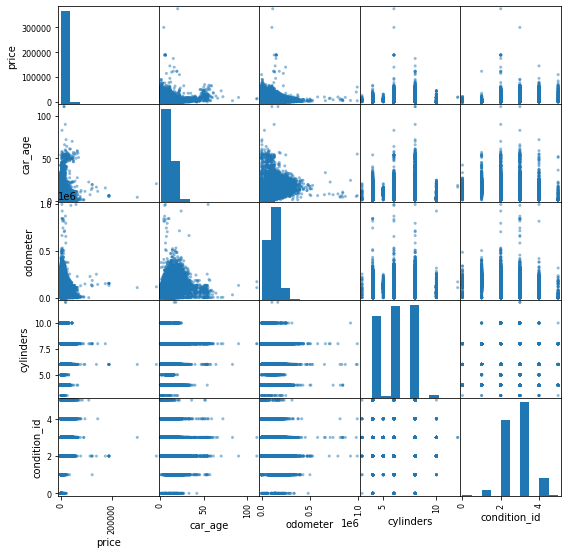

In [45]:
#crearemos una matriz de dispersión para explorar en bruto
cars_set = cars.loc[:, ['price','car_age', 'odometer','cylinders', 'condition_id']]
pd.plotting.scatter_matrix(cars_set, figsize=(9,9), grid=True)
plt.show()


In [46]:
cars_set.corr()

,price,car_age,odometer,cylinders,condition_id
price,1.000000,-0.411251,-0.393279,0.300342,0.221518
car_age,-0.411251,1.000000,0.432828,0.149396,-0.268762
odometer,-0.393279,0.432828,1.000000,0.085536,-0.318987
cylinders,0.300342,0.149396,0.085536,1.000000,-0.065661
condition_id,0.221518,-0.268762,-0.318987,-0.065661,1.000000


<font color=green>
  Observando los gráficos, vemos que tenemos varios valores atípicos en los parámetros seleccionados. 
</font>

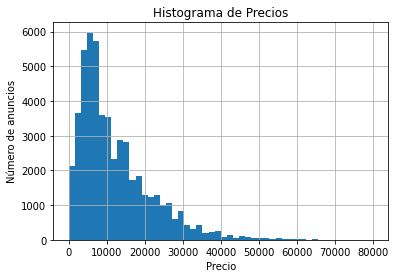

In [47]:
cars['price'].hist(bins=50, range=(0,80000))
plt.title('Histograma de Precios')
plt.ylabel('Número de anuncios')
plt.xlabel('Precio')
plt.show()

Text(0, 0.5, 'Precio')

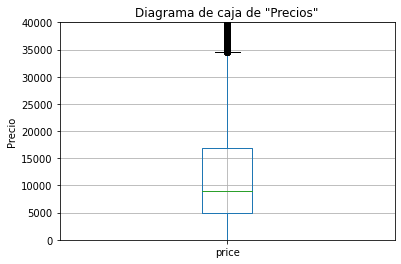

In [48]:
#Diagrama de caja de Precio
cars.boxplot(column='price')
plt.ylim(0,40000)
plt.title('Diagrama de caja de "Precios"')
plt.ylabel('Precio')

Quartile 1: 5000.0
Quartile 3: 16839.0
Bigote inferior: -12758.5
Bigote superior: 34597.5
IQR: 11839.0


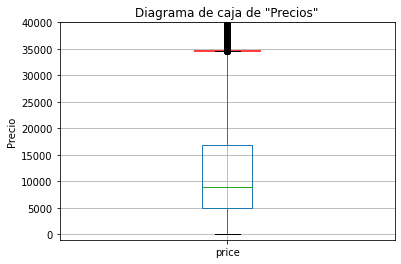

In [49]:
Q1_price = cars['price'].quantile(0.25)
Q3_price = cars['price'].quantile(0.75)
IQR = Q3_price - Q1_price
plt.ylim(-1000,40000)
cars.boxplot(column='price')
plt.hlines(y=Q1_price-1.5*IQR, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3_price+1.5*IQR,xmin=0.9,xmax=1.1, color ='red')
plt.title('Diagrama de caja de "Precios"')
plt.ylabel('Precio')

print('Quartile 1:',Q1_price)
print('Quartile 3:',Q3_price)
print('Bigote inferior:', Q1_price-1.5*IQR)
print('Bigote superior:', Q3_price+1.5*IQR)
print('IQR:',IQR)

<font color=green>
  Viendo el histograma de Precio, vemos que una gran cantidad se está vendiendo por menos de 10.000. Y a partir de los estos, aumentando el valor, la cantidad de vehiculos disminuye. Algo muy parecido observamos en los boxplot. Además observamos que tenemos valores atípicos a partir de los 35.000.
</font>

In [50]:
def pivot(df, ind, val, func):
    return df.pivot_table(index=ind, values=val, aggfunc=func)

AxesSubplot(0.125,0.125;0.775x0.755)


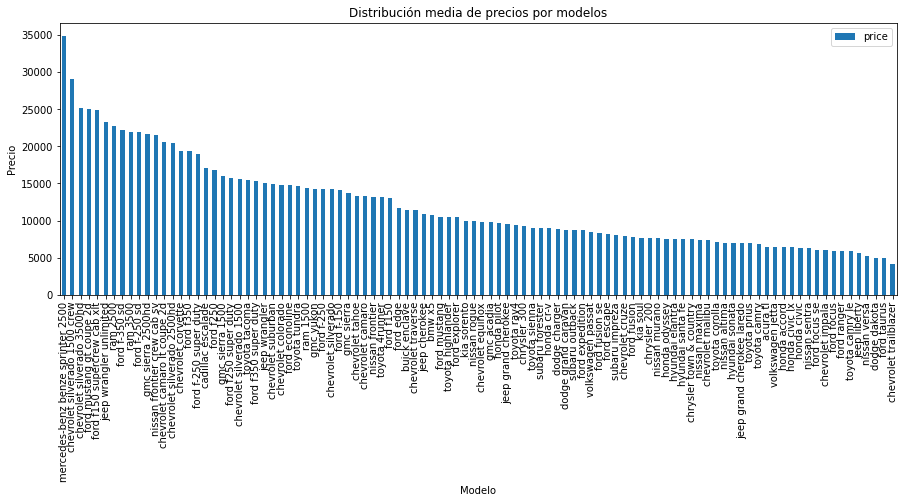

In [51]:
#cars['model'].value_counts().plot(kind='bar', title='Distribución por modelo' , figsize=(15, 5))
models_stat = pivot(cars, 'model', 'price', 'mean')
print(models_stat.sort_values(by=['price'], ascending=False).plot(kind='bar', title='Distribución media de precios por modelos' , figsize=(15, 5)))
plt.xlabel('Modelo')
plt.ylabel('Precio')
plt.show()

Text(0, 0.5, 'millas')

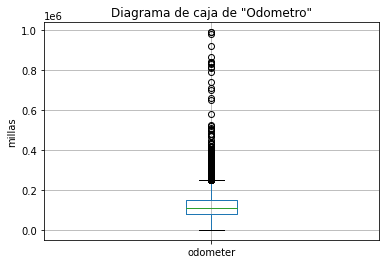

In [52]:
#Diagrama de caja de Odometro
cars.boxplot(column='odometer')
plt.title('Diagrama de caja de "Odometro"')
plt.ylabel('millas')

Quartile 1: 79009.0
Quartile 3: 147821.0
Bigote inferior: -24209.0
Bigote superior: 251039.0
IQR: 68812.0


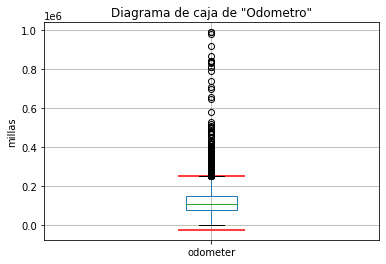

In [53]:
Q1_odo = cars['odometer'].quantile(0.25)
Q3_odo = cars['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo
cars.boxplot(column='odometer')
plt.hlines(y=Q1_odo-1.5*IQR_odo, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3_odo+1.5*IQR_odo,xmin=0.9,xmax=1.1, color ='red')
plt.title('Diagrama de caja de "Odometro"')
plt.ylabel('millas')

print('Quartile 1:',Q1_odo)
print('Quartile 3:',Q3_odo)
print('Bigote inferior:', Q1_odo-1.5*IQR_odo)
print('Bigote superior:', Q3_odo+1.5*IQR_odo)
print('IQR:',IQR_odo)

<font color=green>
  Observando el odometer en los diagramas de cajas, observamos que el quartile 3 está en 147.821 millas y el quarile 1 está en 79.009 millas. Teniendo valor atípicos sobre el bigote superior, que no son pocos. La mediana es de 68.812 millas
</font>

AxesSubplot(0.125,0.125;0.775x0.755)


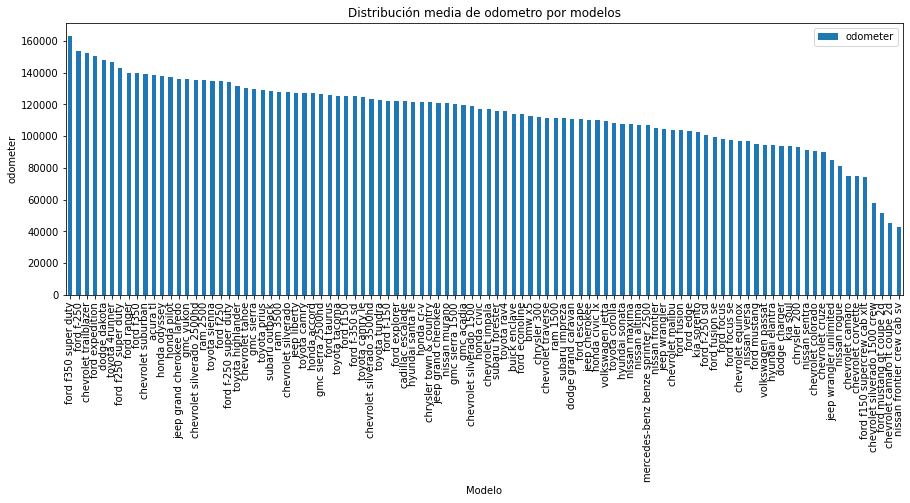

In [54]:
odo_stat = pivot(cars, 'model', 'odometer', 'mean')
print(odo_stat.sort_values(by=['odometer'], ascending=False).plot(kind='bar', title='Distribución media de odometro por modelos' , figsize=(15, 5)))
plt.xlabel('Modelo')
plt.ylabel('odometer')
plt.show()

Text(0, 0.5, 'Años')

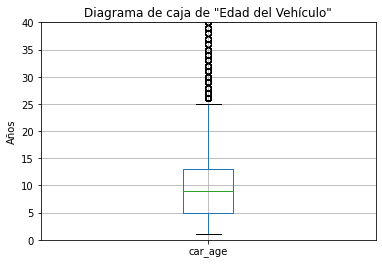

In [55]:
#Diagrama de caja de car_age
cars.boxplot(column='car_age')
plt.ylim(0,40)
plt.title('Diagrama de caja de "Edad del Vehículo"')
plt.ylabel('Años')

Quartile 1: 5.0
Quartile 3: 13.0
Bigote inferior: -7.0
Bigote superior: 25.0
IQR: 8.0


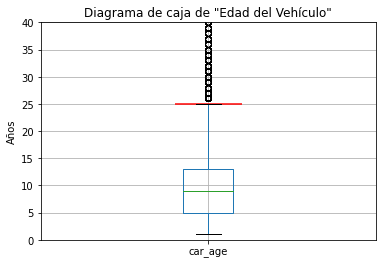

In [56]:
Q1_car_age = cars['car_age'].quantile(0.25)
Q3_car_age = cars['car_age'].quantile(0.75)
IQR_car_age = Q3_car_age - Q1_car_age
plt.ylim(0,40)
cars.boxplot(column='car_age')
plt.hlines(y=Q1_car_age-1.5*IQR_car_age, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3_car_age+1.5*IQR_car_age,xmin=0.9,xmax=1.1, color ='red')
plt.title('Diagrama de caja de "Edad del Vehículo"')
plt.ylabel('Años')

print('Quartile 1:',Q1_car_age)
print('Quartile 3:',Q3_car_age)
print('Bigote inferior:', Q1_car_age-1.5*IQR_car_age)
print('Bigote superior:', Q3_car_age+1.5*IQR_car_age)
print('IQR:',IQR_car_age)

<font color=green>
 Respecto a la edad del vehículo al momento de ser publicado, encontramos que el Q1 y Q3 está entre 5 y 13 años. Siendo el bigote superior 25 años. Teniendo no pocos vehículos sobre el Q3. La mediana es de 8 años.
</font>

AxesSubplot(0.125,0.125;0.775x0.755)


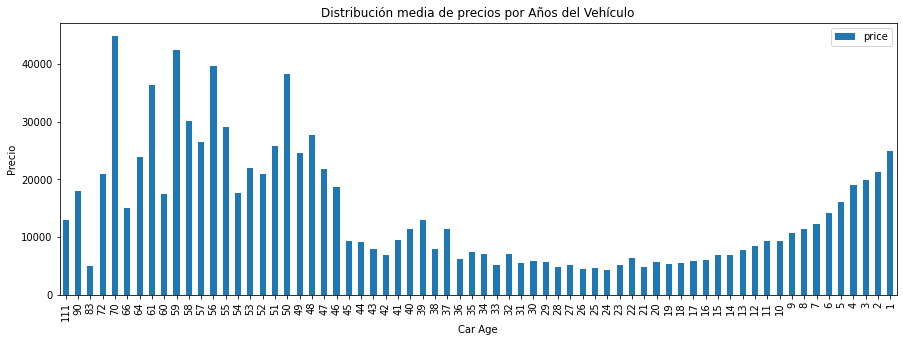

In [57]:
car_age_stat = pivot(cars, 'car_age', 'price', 'mean')
print(car_age_stat.sort_values(by=['car_age'], ascending=False).plot(kind='bar', title='Distribución media de precios por Años del Vehículo' , figsize=(15, 5)))
plt.xlabel('Car Age')
plt.ylabel('Precio')
plt.show()

<font color=green>
También observamos que los autos más antiguos (sobre 45 años) tienen una tendencia de tener el valor auto. Podrían ser autos de colección, por ejemplo. Y los autos inferiores a 10 años tienden a tener mayor valor también, pero no superando los precios de 30.000
</font>

Text(0, 0.5, 'cantidad de vehículos')

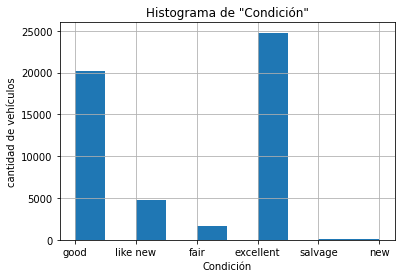

In [58]:
cars['condition'].hist()
plt.title('Histograma de "Condición"')
plt.xlabel('Condición')
plt.ylabel('cantidad de vehículos')

In [59]:
#
cars_hist = cars.pivot_table(columns=['condition', 'condition_id'], values='odometer', aggfunc='median')
cars_hist

condition,excellent,fair,good,like new,new,salvage
condition_id,3,1,2,4,5,0
odometer,106687.682258,183062.233577,129919.93098,79426.738166,12632.0,140919.989796


Text(0, 0.5, 'cantidad de vehículos')

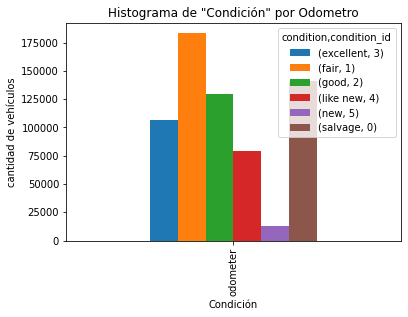

In [60]:
cars_hist.plot(kind='bar')
plt.title('Histograma de "Condición" por Odometro')
plt.xlabel('Condición')
plt.ylabel('cantidad de vehículos')

<font color=green>
 Al observar la condición de los vehículos, observamos que tenemos una mayor cantidad de autos en condiciones fair y salvage seguido por good y excellent
</font>

AxesSubplot(0.125,0.125;0.775x0.755)


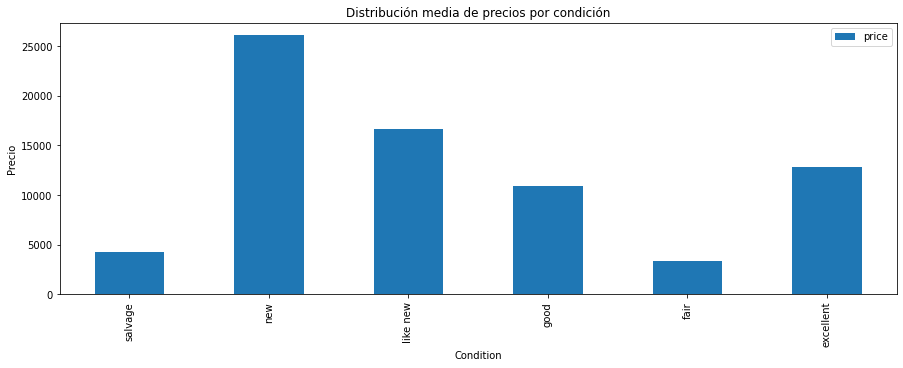

In [61]:
condition_stat = pivot(cars, 'condition', 'price', 'mean')
print(condition_stat.sort_values(by=['condition'], ascending=False).plot(kind='bar', title='Distribución media de precios por condición' , figsize=(15, 5)))
plt.xlabel('Condition')
plt.ylabel('Precio')
plt.show()

<font color=green>
Y en rango de precios, la mayor cantidad son los new, like new, excellent y good. Y los por debajo de un valor de 5.000 son los fair y salvage
</font>

Text(0, 0.5, 'Cantidad de vehiculos')

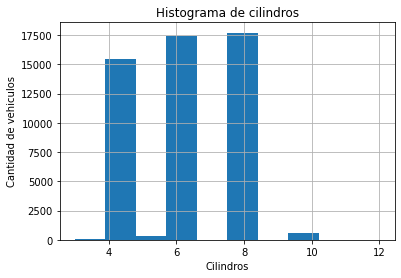

In [62]:
#
cars['cylinders'].hist()
plt.title('Histograma de cilindros')
plt.xlabel('Cilindros')
plt.ylabel('Cantidad de vehiculos')


In [63]:
pivot(cars, 'cylinders', 'price', ['mean', 'sum', 'count'])

,mean,sum,count
,price,price,price
cylinders,,,
3,8571.911765,291445,34
4,7836.422285,121456709,15499
5,7240.438776,2128689,294
6,12373.427932,215730716,17435
8,15893.543869,281506449,17712
10,7237.244080,3973247,549
12,19000.000000,38000,2


<font color=green>
En los cilindros, vemos que lo más notorio son los vehículos con 4, 6 y 8 cilindros. Tenemos muy pocos con 3 y 12 cilindros y otros con 5 y 10 cilindros.
</font>

## Estudiar y tratar valores atípicos


<font color=purple>
Verifiquemos primero los valores más detallados de precio y su limite inferior y superior.
</font>

In [64]:
cars['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

<font color=green>
Tenemos un precio de media de 12.132 y una mediana de 9.000. Esto nos indica que tenemos valores atípicos, además tenemos una desviación estandard de 10.040 que también nos indica valores atípicos que debemos analizar.
</font>

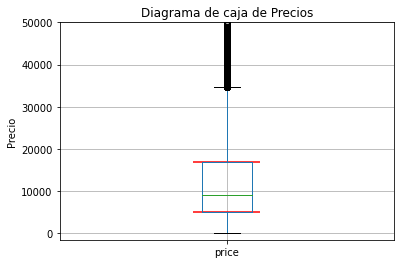

Quartile 1: 5000.0
Quartile 3: 16839.0


In [65]:
cars.boxplot(column='price')
plt.ylim(-1500, 50000)
plt.hlines(y=[Q1_price, Q3_price], xmin=0.9, xmax=1.1, color='red')
plt.title('Diagrama de caja de Precios')
plt.ylabel('Precio')

plt.show()



Q1_price = cars['price'].quantile(0.25)
Q3_price = cars['price'].quantile(0.75)
print('Quartile 1:',Q1_price)
print('Quartile 3:',Q3_price)

<font color=green>
Observamos que los bigotes son asimétricos, y los quantiles coinciden con los bordes de la caja. El bigote inferior está en el 0.
    A continuación comprobaremos el bigote superior e inferior.
</font>

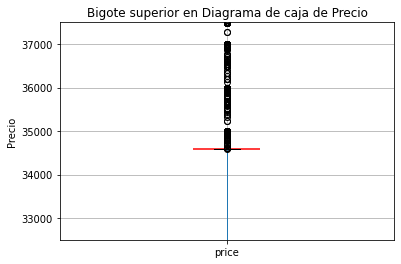

In [66]:
IQR_price = Q3_price - Q1_price
cars.boxplot(column='price')
plt.ylim(32500, 37500)
plt.hlines(y=(Q3_price+1.5*IQR_price), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote superior en Diagrama de caja de Precio')
plt.ylabel('Precio')
plt.show()

Text(0, 0.5, 'Precio')

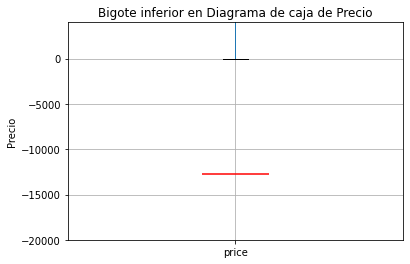

In [67]:
cars.boxplot(column='price')
plt.ylim(-20000,4000)
plt.hlines(y=(Q1_price-1.5*IQR_price), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote inferior en Diagrama de caja de Precio')
plt.ylabel('Precio')

<font color=green>
Podemos observar que el bigote superior coincide con los valores teoricos y trazados.
    El bigote inferior y su valor teórico está muy por debajo del valor trazado que es 0. Indicandonos que nuestros datos están concetrados en los valores más pequeños.
</font>

In [68]:
#Dividiremos el DF en 2 partes para la columna de precio
#Recordemos las variables usadas para calcular el bigote superior e inferior 
Q1_price = cars['price'].quantile(0.25)
Q3_price = cars['price'].quantile(0.75)
big_inf_price = Q1_price-1.5*IQR_price
big_sup_price = Q3_price+1.5*IQR_price

cars_price_in = cars.query('@big_inf_price< price < @big_sup_price ') # IN the bracket
cars_price_out = cars.query('@big_sup_price<price') # OUT the bracket


Text(0.5, 0, 'Precio')

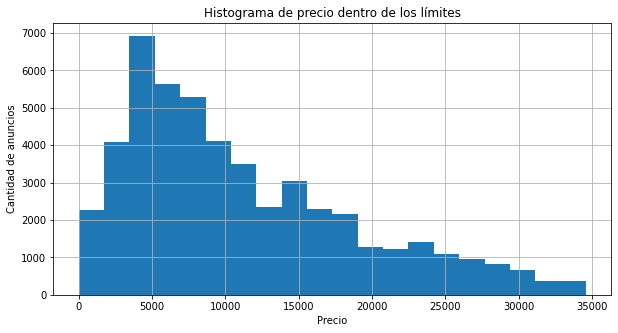

In [69]:
#veamos un histograma y como se comportan los valores dentro de los limites.
cars_price_in['price'].hist(bins=20, figsize=(10,5))
plt.title('Histograma de precio dentro de los límites')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('Precio')

Text(0.5, 0, 'Cantidad de anuncios')

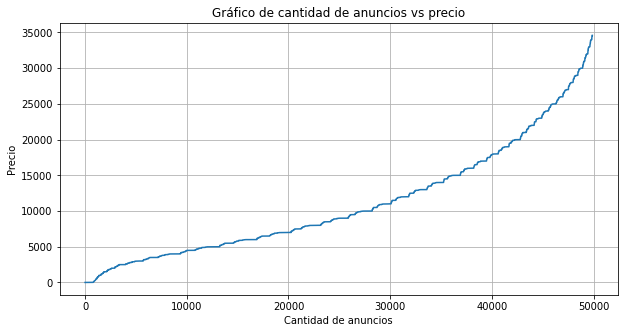

In [70]:
cars_price_in['price'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.title('Gráfico de cantidad de anuncios vs precio')
plt.ylabel('Precio')
plt.xlabel('Cantidad de anuncios')

In [71]:
cars_price_in['price'].describe()

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64

<font color=green>
Estando dentro de los valores inferiores del bigote superior y superior del bigote inferior, podemos observar nuestra mayor densidad de vehículos rondan al rededor del precio de 5.000. Siendo que hasta un 50% de los valores están debajo de los 9.000 con un valor máximo de casi 35.000 y un mínimo de 1 que puediesen ser los vehículos en condición de "salvage"
</font>

<font color=purple>
    Seguimos con la columna odometer
</font>

Quartile 1: 79009.0
Quartile 3: 147821.0


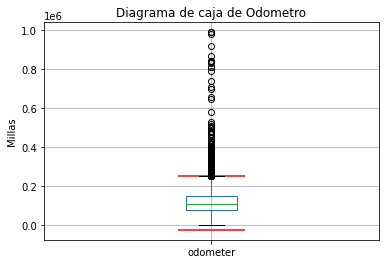

In [72]:
Q1_odo = cars['odometer'].quantile(0.25)
Q3_odo = cars['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo
cars.boxplot(column='odometer')
plt.hlines(y=Q1_odo-1.5*IQR_odo, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3_odo+1.5*IQR_odo,xmin=0.9,xmax=1.1, color ='red')
plt.title('Diagrama de caja de Odometro')
plt.ylabel('Millas')


print('Quartile 1:',Q1_odo)
print('Quartile 3:',Q3_odo)

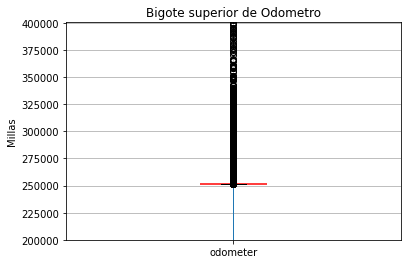

In [73]:
#Bigote superior
IQR_odo = Q3_odo - Q1_odo
cars.boxplot(column='odometer')
plt.ylim(200000, 400500)
plt.hlines(y=(Q3_odo+1.5*IQR_odo), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote superior de Odometro')
plt.ylabel('Millas')
plt.show()

Text(0, 0.5, 'Millas')

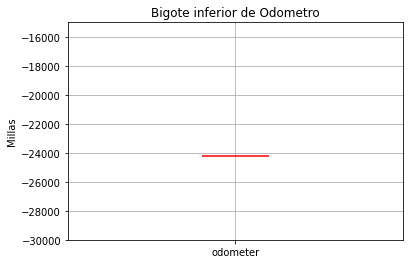

In [74]:
#Bigote inferior
cars.boxplot(column='odometer')
plt.ylim(-30000,-15000)
plt.hlines(y=(Q1_odo-1.5*IQR_odo), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote inferior de Odometro')
plt.ylabel('Millas')

In [75]:
#Dividiremos el DF en 2
Q1_odo = cars['odometer'].quantile(0.25)
Q3_odo = cars['odometer'].quantile(0.75)
big_inf_odo = Q1_odo-1.5*IQR_odo
big_sup_odo = Q3_odo+1.5*IQR_odo

cars_odo_in = cars.query('@big_inf_odo< odometer < @big_sup_odo ') # IN the bracket
cars_odo_out = cars.query('@big_sup_odo<odometer') # OUT the bracket

Text(0, 0.5, 'Cantidad de vehículos')

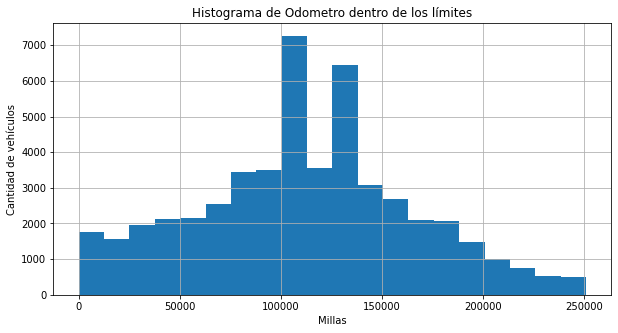

In [76]:
cars_odo_in['odometer'].hist(bins=20, figsize=(10,5))
plt.title('Histograma de Odometro dentro de los límites')
plt.xlabel('Millas')
plt.ylabel('Cantidad de vehículos')

In [77]:
# Observamos 2 pilares marcadamente mayores, veamos cuales son
cars_odo_in['odometer'].value_counts().head(10)



106687.682258    3800
129919.930980    3092
79426.738166      728
183062.233577     237
0.000000          185
140000.000000     183
120000.000000     179
130000.000000     178
160000.000000     167
200000.000000     166
Name: odometer, dtype: int64

Text(0.5, 0, 'Cantidad de anuncios')

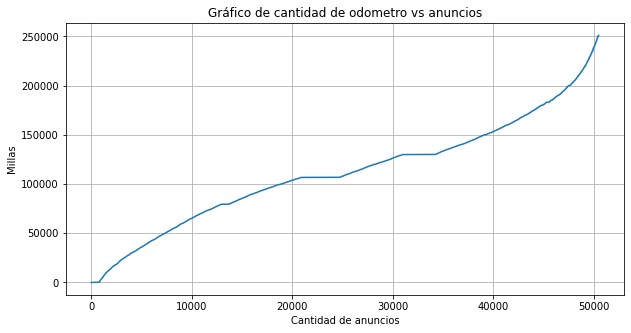

In [78]:
cars_odo_in['odometer'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.title('Gráfico de cantidad de odometro vs anuncios')
plt.ylabel('Millas')
plt.xlabel('Cantidad de anuncios')

In [79]:
cars_odo_in['odometer'].describe()

count     50500.000000
mean     111766.753322
std       53576.314521
min           0.000000
25%       78000.000000
50%      109000.000000
75%      144110.000000
max      251000.000000
Name: odometer, dtype: float64

<font color=green>
En la columna odometer, observamos una curiosidad. 2 columnas con mayor cantidad de odometer, una de 106.687 y la otra con 129.919 millas. Estas dos columnas son de 4 a 5 veces más comunes que los valores que los siguen. El máximo tiene un millaje de 251.000 y el mínimo 0, el cuál podría corresponder a un vehículo nuevo
</font>

<font color=purple>
    Seguimos con la columna de edad del vehículo
</font>

Quartile 1: 5.0
Quartile 3: 13.0


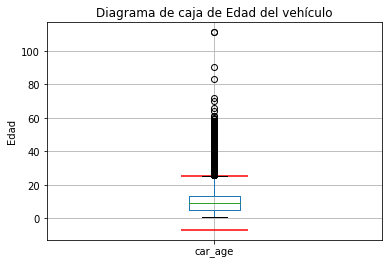

In [80]:
Q1_car_age = cars['car_age'].quantile(0.25)
Q3_car_age = cars['car_age'].quantile(0.75)
IQR_car_age = Q3_car_age - Q1_car_age
cars.boxplot(column='car_age')
plt.hlines(y=Q1_car_age-1.5*IQR_car_age, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q3_car_age+1.5*IQR_car_age,xmin=0.9,xmax=1.1, color ='red')
plt.title('Diagrama de caja de Edad del vehículo')
plt.ylabel('Edad')


print('Quartile 1:',Q1_car_age)
print('Quartile 3:',Q3_car_age)

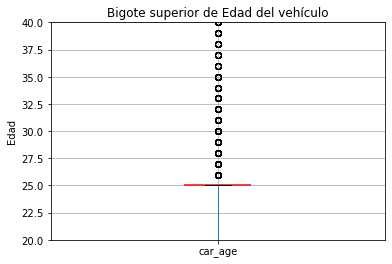

In [81]:
#Bigote superior
IQR_car_age = Q3_car_age - Q1_car_age
cars.boxplot(column='car_age')
plt.ylim(20, 40)
plt.hlines(y=(Q3_car_age+1.5*IQR_car_age), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote superior de Edad del vehículo')
plt.ylabel('Edad')


plt.show()

Text(0, 0.5, 'Edad')

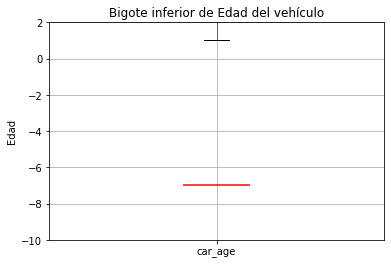

In [82]:
#Bigote inferior
cars.boxplot(column='car_age')
plt.ylim(-10,2)
plt.hlines(y=(Q1_car_age-1.5*IQR_car_age), xmin=0.9, xmax=1.1, color='red')
plt.title('Bigote inferior de Edad del vehículo')
plt.ylabel('Edad')


In [83]:
#Dividiremos el DF en 2
Q1_car_age = cars['car_age'].quantile(0.25)
Q3_car_age = cars['car_age'].quantile(0.75)
big_inf_car_age = Q1_car_age-1.5*IQR_car_age
big_sup_car_age = Q3_car_age+1.5*IQR_car_age

cars_car_age_in = cars.query('@big_inf_car_age< car_age < @big_sup_car_age ') # IN the bracket
cars_car_age_out = cars.query('@big_sup_car_age<car_age') # OUT the bracket

Text(0.5, 0, 'Años')

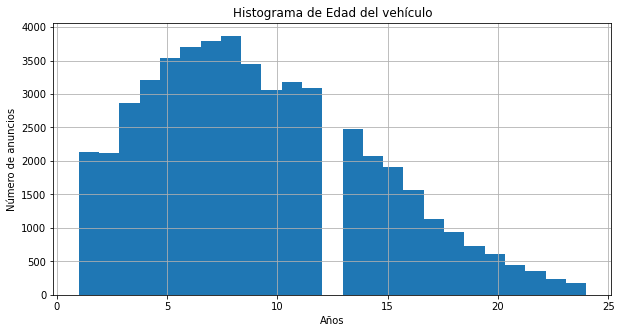

In [84]:
# Veamos como se distribuyen los datos antre los bigotes
cars_car_age_in['car_age'].hist(bins=25, figsize=(10,5))
plt.title('Histograma de Edad del vehículo')
plt.ylabel('Número de anuncios')
plt.xlabel('Años')

#desconozco porqué me aparece un vacío dentro, como si no hubiese datos para la edad de 12 años arprox

Text(0.5, 0, 'Años')

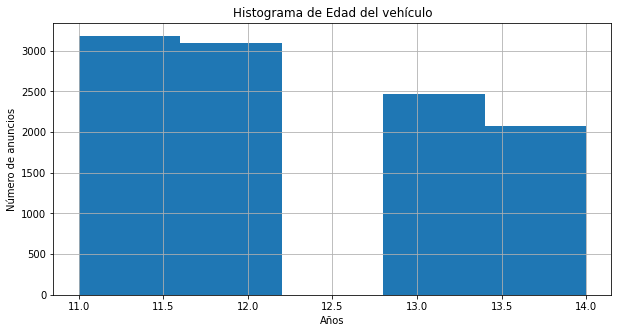

In [85]:
#un exploratorio más profundo de los años en blanco:
cars_mid = cars.query('10<car_age<15')
cars_mid['car_age'].hist(bins=5, figsize=(10,5))
plt.title('Histograma de Edad del vehículo')
plt.ylabel('Número de anuncios')
plt.xlabel('Años')


Text(0.5, 0, 'Cantidad de anuncios')

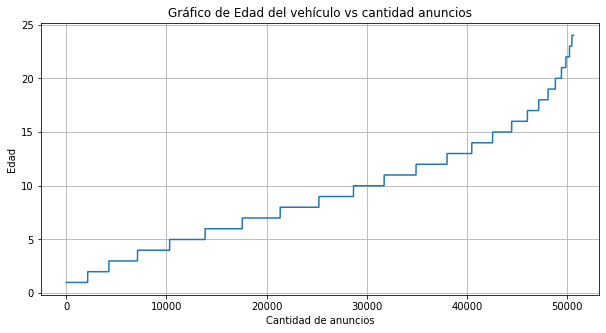

In [86]:
cars_car_age_in['car_age'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.title('Gráfico de Edad del vehículo vs cantidad anuncios')
plt.ylabel('Edad')
plt.xlabel('Cantidad de anuncios')


In [87]:
cars_car_age_in['car_age'].describe()

count    50638.000000
mean         9.138611
std          5.099310
min          1.000000
25%          5.000000
50%          9.000000
75%         12.000000
max         24.000000
Name: car_age, dtype: float64

<font color=green>
Observamos que hasta la mitad de los vehículos se encuentre con hasta 9 años, siendo los 9 años la media y mediana también. El máximo de edad de un vehículo es de 24 años y el mínimo de 1 año (pudiendo ser éste nuevamente un vehículo 0 millas)
</font>

<font color=purple>
    Seguimos con la columna de Cilindros
</font>

Text(0, 0.5, 'Cantidad de vehículos')

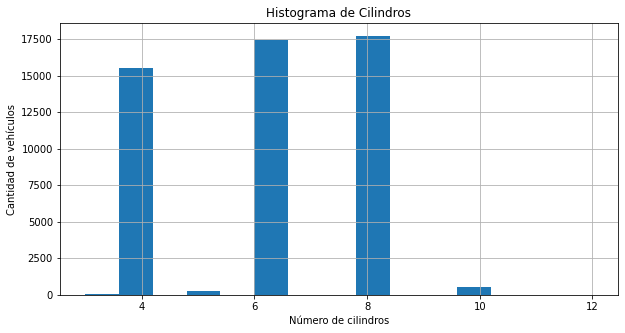

In [88]:
# Veamos nuevamente como se distribuyen todos los valores
cars['cylinders'].hist(bins=15, figsize=(10,5))
plt.title('Histograma de Cilindros')
plt.xlabel('Número de cilindros')
plt.ylabel('Cantidad de vehículos')

In [89]:
# Para esta columna es más útil tener un conteo exacto
cars['cylinders'].value_counts()

8     17712
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64

In [90]:
# Separemos el DF en 2, según el número de cilindros más comunes y el resto
cars_cylinders_in = cars[(cars['cylinders'] == 4) | (cars['cylinders'] == 6) | (cars['cylinders'] == 8)]['cylinders']
cars_cylinders_out = cars[(cars['cylinders'] != 4) & (cars['cylinders'] != 6) & (cars['cylinders'] != 8)]['cylinders']

In [91]:
# Veamos el porcentaje de estos cilindros tipicos entre el total de anuncios
print('Porcentaje:', len(cars_cylinders_in)*100/len(cars), '%')

Porcentaje: 98.29403202328966 %


In [92]:
cars_cylinders_in.value_counts(normalize=True)*100

8    34.972160
6    34.425226
4    30.602614
Name: cylinders, dtype: float64

<font color=green>
En la columna Cylinders, observamos que tres tipos de cilindros contienen el 98% de los más comunes, siendo vehículos de 4, 6 y 8 cilindros.
</font>

<font color=purple>
    Seguimos con la columna de condition
</font>

Text(0, 0.5, 'Cantidad de anuncios')

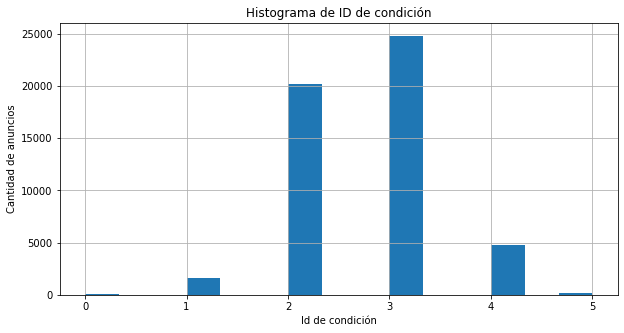

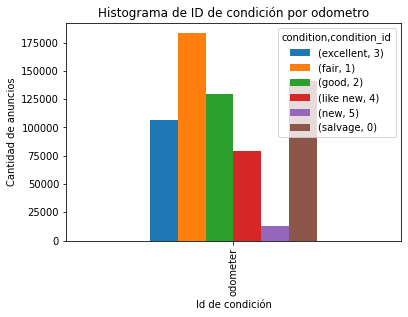

In [93]:
# Veamos como se distribuyen todos los valores
cars['condition_id'].hist(bins=15, figsize=(10,5))
plt.title('Histograma de ID de condición')
plt.xlabel('Id de condición')
plt.ylabel('Cantidad de anuncios')

cars_hist.plot(kind='bar')
plt.title('Histograma de ID de condición por odometro')
plt.xlabel('Id de condición')
plt.ylabel('Cantidad de anuncios')

In [94]:
#Para esta columna es más útil tener un conteo exacto
cars['condition_id'].value_counts(normalize=True)*100

3    48.079573
2    39.097525
4     9.203299
1     3.118874
5     0.277535
0     0.223193
Name: condition_id, dtype: float64

In [95]:
# Separemos el DF en 2, según el número de condiciones más comunes y el resto
cars_condition_in = cars[(cars['condition_id'] == 2) | (cars['condition_id'] == 3) | (cars['condition_id'] == 4)]['condition_id']
cars_condition_out = cars[(cars['condition_id'] != 2) & (cars['condition_id'] != 3) & (cars['condition_id'] != 4)]['condition_id']

In [96]:
# Veamos el porcentaje de estos condiciones tipicos entre el total de anuncios
print('Porcentaje:', len(cars_condition_in)*100/len(cars), '%')

Porcentaje: 96.38039786511402 %


In [97]:
cars_condition_in.value_counts(normalize=True)*100

3    49.885219
2    40.565848
4     9.548933
Name: condition_id, dtype: float64

<font color=green>
En la columna de condiciones, observamos que tres condiciones contienen el 96% de los más comunes, siendo vehículos de una condición excelente, good y like new.
</font>

## Estudiar parámetros principales sin valores atípicos

In [98]:
#Valores mínimos
print('Precio: ', cars['price'].min())
print('Odometer: ', cars['odometer'].min())
print('Car_age: ', cars['car_age'].min())

Precio:  1
Odometer:  0.0
Car_age:  1


<font color=green>
Como habíamos visto en las tareas anteriores, tanto la edad como precio es mínimo 1 y el odometer 0, pudiendo tratarse de vehículos nuevos
</font>

In [99]:
#Valores máximos
print('Precio máximo:', cars_price_out['price'].max())
print('Odómetro máximo:', cars_odo_out['odometer'].max())
print('Edad máxima:', cars_car_age_out['car_age'].max())

Precio máximo: 375000
Odómetro máximo: 990000.0
Edad máxima: 111


<font color=purple>
    columna de precio atípico
</font>

Text(0.5, 0, 'Precios')

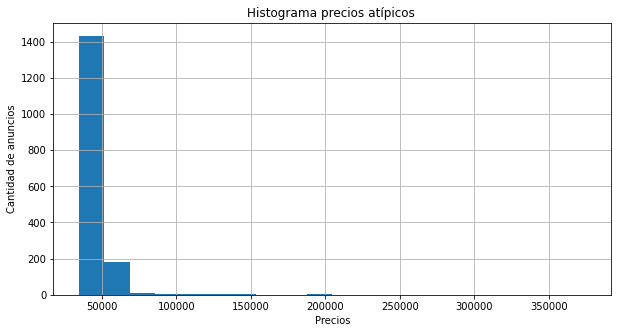

In [100]:
cars_price_out['price'].hist(bins=20, figsize=(10,5))
plt.title('Histograma precios atípicos ')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('Precios')

Text(0.5, 0, 'Cantidad de anuncios')

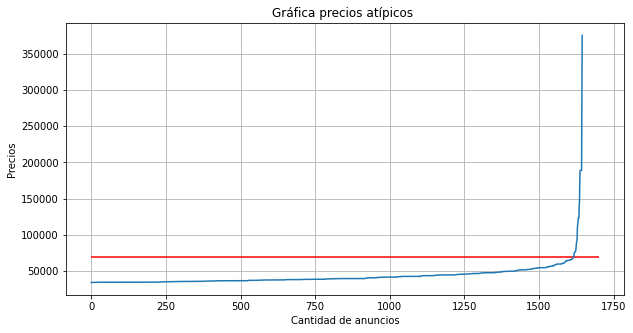

In [101]:
cars_price_out['price'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=70000, color='red', xmin=0, xmax=1700)
plt.title('Gráfica precios atípicos ')
plt.ylabel('Precios')
plt.xlabel('Cantidad de anuncios')


In [102]:
cars_price_out['price'].describe()

count      1646.000000
mean      43554.006075
std       17013.005743
min       34599.000000
25%       36616.250000
50%       39777.000000
75%       45873.250000
max      375000.000000
Name: price, dtype: float64

In [103]:
len(cars_price_out[cars_price_out['price']>=70000])

29

<font color=green>
Los valores atípicos aumentan de manera constante hasta un valor aproximado de 70000. Luego de este valor, los precios aumentan muy rapidamente llegando hasta 375.000.
</font>

<font color=purple>
    columna de odometer atípico
</font>

Text(0.5, 0, 'Millas')

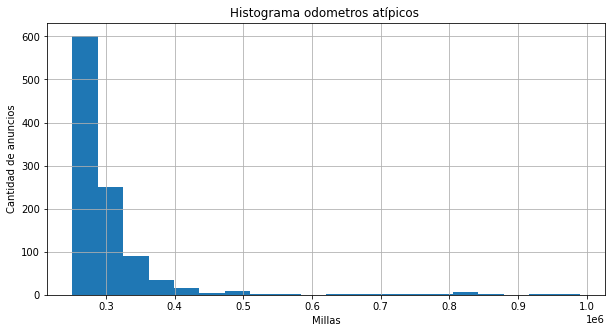

In [104]:
cars_odo_out['odometer'].hist(bins=20, figsize=(10,5))
plt.title('Histograma odometros atípicos ')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('Millas')

Text(0.5, 0, 'Cantidad de anuncios')

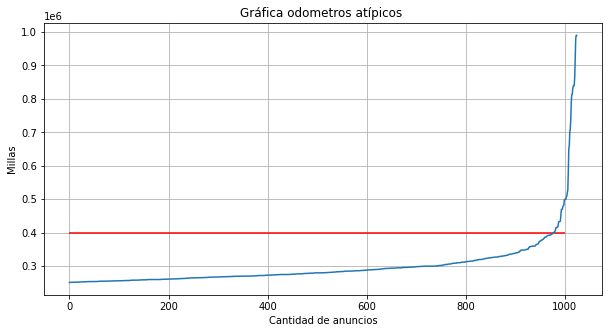

In [105]:
cars_odo_out['odometer'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=400000, color='red', xmin=0, xmax=1000)
plt.title('Gráfica odometros atípicos ')
plt.ylabel('Millas')
plt.xlabel('Cantidad de anuncios')

In [106]:
cars_odo_out['odometer'].describe()

count      1025.000000
mean     301693.069268
std       81262.709880
min      251285.000000
25%      265137.000000
50%      280000.000000
75%      306455.000000
max      990000.000000
Name: odometer, dtype: float64

In [107]:
len(cars_odo_out[cars_odo_out['odometer']>=400000])

48

<font color=green>
Al igual que con la variable anterior, tenemos un aumento gradual hasta llegar a un valor para luego aumentar muy rápidamente.
</font>

<font color=purple>
    columna de car_age atípico
</font>

Text(0.5, 0, 'Años')

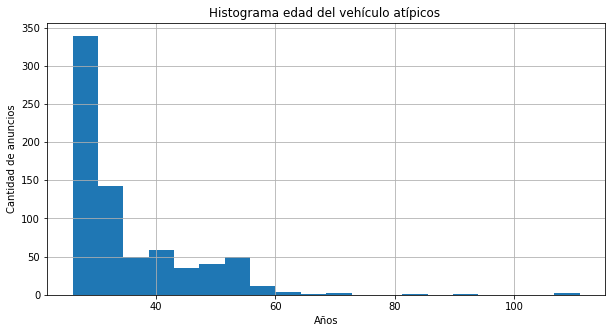

In [108]:
cars_car_age_out['car_age'].hist(bins=20, figsize=(10,5))
plt.title('Histograma edad del vehículo atípicos ')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('Años')

Text(0.5, 0, 'Cantidad de anuncios')

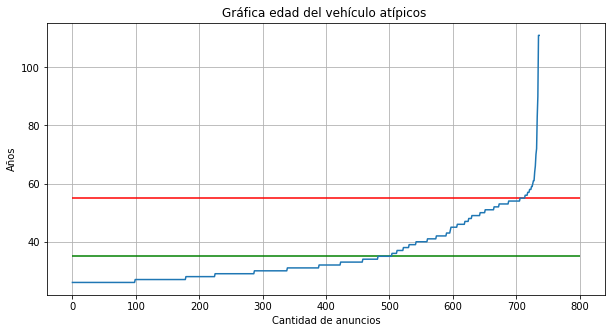

In [109]:
cars_car_age_out['car_age'].sort_values().reset_index(drop=True).plot(figsize=(10,5), grid=True)
plt.hlines(y=55, color='red', xmin=0, xmax=800)
plt.hlines(y=35, color='green', xmin=0, xmax=800)
plt.title('Gráfica edad del vehículo atípicos ')
plt.ylabel('Años')
plt.xlabel('Cantidad de anuncios')

In [110]:
cars_car_age_out['car_age'].describe()

count    737.000000
mean      35.128901
std       10.481788
min       26.000000
25%       28.000000
50%       31.000000
75%       40.000000
max      111.000000
Name: car_age, dtype: float64

In [111]:
len(cars_car_age_out[cars_car_age_out['car_age']>=55])

31

<font color=green>
Podemos observar 3 rangos diferentes. El primero que aumenta "escalonadamente" de 26 a 35 años, el segundo que aumenta más rápido es de 35 a 55 años y el tercero desde los 55 años en adelante tiene un incremento rápido.
</font>

<font color=purple>
    columna de cylinders atípico
</font>

Text(0.5, 0, 'nº cilindros')

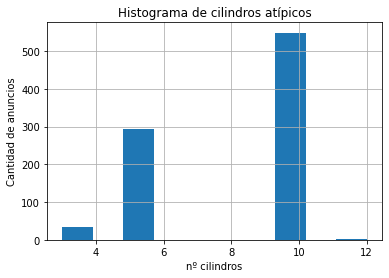

In [112]:
cars_cylinders_out.hist()
plt.title('Histograma de cilindros atípicos')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('nº cilindros')

In [113]:
cars_cylinders_out.value_counts()

10    549
5     294
3      34
12      2
Name: cylinders, dtype: int64

<font color=green>
Observamos que tenemos una gran cantidad en el tipo de vehículo con 10 cilindros, seguido de 5 cilindros. Y los vehículos de tres cilindros con menos cantidad y con muy poca cantidad son los vehículos con 12 cilindros.
</font>

<font color=purple>
    columna de condition_id atípico
</font>

Text(0.5, 0, 'ID Condición')

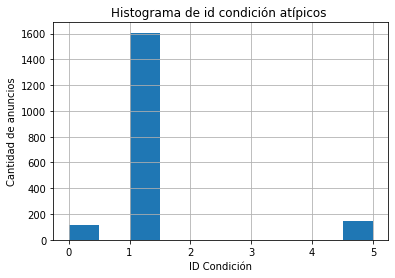

In [114]:
cars_condition_out.hist()
plt.title('Histograma de id condición atípicos ')
plt.ylabel('Cantidad de anuncios')
plt.xlabel('ID Condición')

In [115]:
cars_condition_out.value_counts()

1    1607
5     143
0     115
Name: condition_id, dtype: int64

<font color=green>
Observamos gran cantidad en condición de fair, que es la condición que concentra la gran mayoría de valores atípicos.
    También observamos que tenemos un pequeño porcentaje de vehículos en condición salvage y nuevos, que, como anteriormente visto, tiene lógica con algunos segmentos en el análisis de los valores dentro de los rangos normales.
</font>

## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

In [116]:
cars['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

<font color=green>
Observamos lo siguiente:
    
- El 75% de los vehículos se venden dentro de los 53 días. 
- El 50% de los vehículos se venden dentro de los 33 días.
- El 25% de los vehículos se venden dentro de los 19 días.

- En promedio, un vehículo publicado se demora 28 días en ser vendido
    
- El poder determinar cuándo un anuncio está publicado por un tiempo anormalmente largo, es más complejo. Porque el máximo de los días publicado al momento de analizar el DF, es de 271. Puede ser que haya un error en ese dato o simplemente, el vendedor se ha olvidado de bajar la publicación del vehículo o simplemente no se ha vendido.
</font>

## Precio promedio por cada tipo de vehículo

In [117]:
#Agrupemos por tipo y vemos cuánto tenemos
cars.groupby('type')['model'].count()

type
SUV            12405
bus               24
convertible      446
coupe           2303
hatchback       1047
mini-van        1161
offroad          214
other            256
pickup          6988
sedan          12154
truck          12353
van              633
wagon           1541
Name: model, dtype: int64

<font color=green>
Los tres tipos de modelos más vendidos son:

- SUV: 12405
- Truck: 12353
- Sedan: 12154
</font>

In [118]:
#Agrupemos tipo y vemos sus valores promedios
cars.groupby('type')['price'].mean()

type
SUV            11149.400000
bus            17135.666667
convertible    14575.881166
coupe          14353.442901
hatchback       6868.513849
mini-van        8193.177433
offroad        14292.294393
other          10989.714844
pickup         16057.410418
sedan           6965.358647
truck          16734.894924
van            10546.941548
wagon           9088.134328
Name: price, dtype: float64

<font color=green>
Observamos:

- Los buses son los que menos cantidad de venta tienen, pero con unos de los más caros en valor promedio.
- Los camiones, siendo los segundos más comunes, son los segundos más caros también.
- Los sedan, son los segundo más baratos, pero con el tercer lugar de más cantidad a la venta.

</font>

## Factores de precio

In [119]:
#Primero creamos DF nuevos correspondientes a los 3 tipos más populares
cars_suv = cars[cars['type']=='SUV']
cars_truck = cars[cars['type']=='truck']
cars_sedan = cars[cars['type']=='sedan']

# Veamos el tamaño de estos objetos y comprobemos que tenemos los datos que necesitamos

print('SUV:',len(cars_suv))
print('Truck:',len(cars_truck))
print('Sedan:',len(cars_sedan))

SUV: 12405
Truck: 12353
Sedan: 12154


<font color=purple>
Veremos como se comportan estos tres tipos de vehículos respectivo a su precio. 
</font>

<font color=red>
Tipo SUV
</font>

In [120]:
cars_suv_in = cars_suv[cars_suv['price'].isin(cars_price_in['price'])]
len(cars_suv_in)

12104

In [121]:
cars_suv_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,car_age,avg_miles
price,1.000000,0.546157,-0.002659,-0.477842,0.108008,-0.021901,0.273043,-0.544683,0.203696
model_year,0.546157,1.000000,-0.273887,-0.519082,-0.073741,-0.014591,0.313055,-0.996280,0.462728
cylinders,-0.002659,-0.273887,1.000000,0.216543,0.123676,0.015618,-0.099583,0.272838,-0.130676
odometer,-0.477842,-0.519082,0.216543,1.000000,0.032812,0.013779,-0.353877,0.516745,0.157471
is_4wd,0.108008,-0.073741,0.123676,0.032812,1.000000,-0.006375,-0.016720,0.073018,-0.034767
days_listed,-0.021901,-0.014591,0.015618,0.013779,-0.006375,1.000000,-0.015353,0.014509,-0.010729
condition_id,0.273043,0.313055,-0.099583,-0.353877,-0.016720,-0.015353,1.000000,-0.312433,0.037929
car_age,-0.544683,-0.996280,0.272838,0.516745,0.073018,0.014509,-0.312433,1.000000,-0.470520
avg_miles,0.203696,0.462728,-0.130676,0.157471,-0.034767,-0.010729,0.037929,-0.470520,1.000000


Text(0, 0.5, 'Precio')

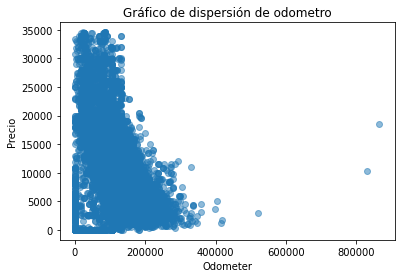

In [122]:
plt.scatter(x=cars_suv_in['odometer'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de odometro')
plt.xlabel('Odometer')
plt.ylabel('Precio')

<font color=green>
Mientras menos millaje tiene el vehículo, más caro es.
</font>

Text(0, 0.5, 'Precio')

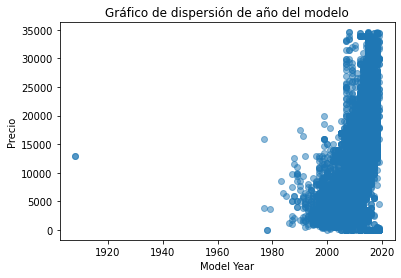

In [123]:
plt.scatter(x=cars_suv_in['model_year'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de año del modelo')
plt.xlabel('Model Year')
plt.ylabel('Precio')

<font color=green>
Mientras más nuevo el vehículo, más caro es.
</font>

Text(0, 0.5, 'Precio')

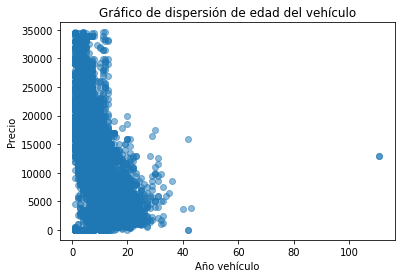

In [124]:
plt.scatter(x=cars_suv_in['car_age'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de edad del vehículo')
plt.xlabel('Año vehículo')
plt.ylabel('Precio')

<font color=green>
Mientras más "joven" el vehículo, más caro es.
</font>

Text(0, 0.5, 'Precio')

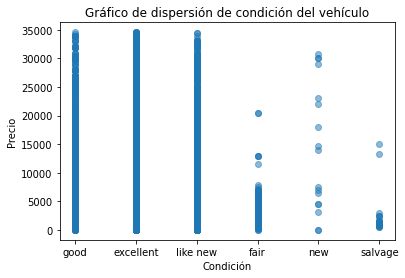

In [125]:
plt.scatter(x=cars_suv_in['condition'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de condición del vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')

<font color=green>
Si el vehículo se encuentra en mejores condiciones, más caro.
</font>

Text(0, 0.5, 'Precio')

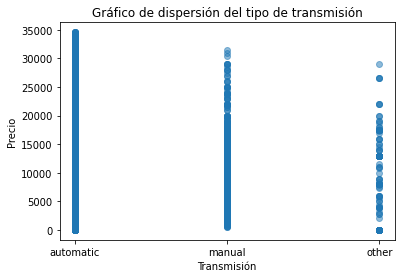

In [126]:
plt.scatter(x=cars_suv_in['transmission'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión del tipo de transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio')

<font color=green>
Un vehículo con una transmisión automática, es más caro que un vehículo con transmisión manual.
</font>

Text(0, 0.5, 'Precio')

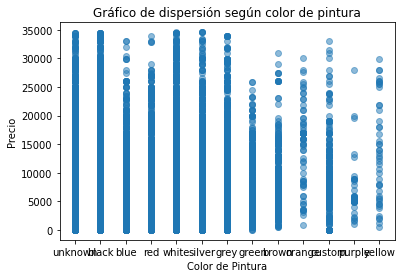

In [127]:
plt.scatter(x=cars_suv_in['paint_color'], y=cars_suv_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión según color de pintura')
plt.xlabel('Color de Pintura')
plt.ylabel('Precio')

<font color=green>
En tema del color de un vehículo, se logra apreciar que en negro y blanco son más caros. Y tenemos una gran variedad de unknown que son caros también.
</font>

<font color=red>
Tipo Truck
</font>

In [128]:
cars_truck_in = cars_truck[cars_truck['price'].isin(cars_price_in['price'])]
len(cars_truck_in)

11550

In [129]:
cars_truck_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,car_age,avg_miles
price,1.000000,0.589829,0.006697,-0.409001,0.270586,0.009817,0.294696,-0.587858,0.231786
model_year,0.589829,1.000000,-0.006856,-0.441593,0.144033,-0.012305,0.315142,-0.996723,0.478106
cylinders,0.006697,-0.006856,1.000000,-0.002663,0.156961,0.007415,-0.009878,0.007748,-0.002213
odometer,-0.409001,-0.441593,-0.002663,1.000000,-0.045773,0.000891,-0.297929,0.440690,0.227839
is_4wd,0.270586,0.144033,0.156961,-0.045773,1.000000,0.005022,0.093152,-0.143203,0.073930
days_listed,0.009817,-0.012305,0.007415,0.000891,0.005022,1.000000,0.006112,0.012609,-0.020231
condition_id,0.294696,0.315142,-0.009878,-0.297929,0.093152,0.006112,1.000000,-0.313760,0.057773
car_age,-0.587858,-0.996723,0.007748,0.440690,-0.143203,0.012609,-0.313760,1.000000,-0.484710
avg_miles,0.231786,0.478106,-0.002213,0.227839,0.073930,-0.020231,0.057773,-0.484710,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

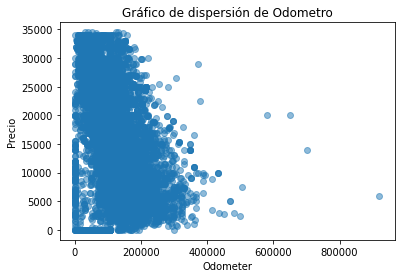

In [130]:
plt.scatter(x=cars_truck_in['odometer'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de Odometro')
plt.xlabel('Odometer')
plt.ylabel('Precio')
plt.show



<font color=green>
También observamos que mientras menos millaje, más caro el vehículo.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

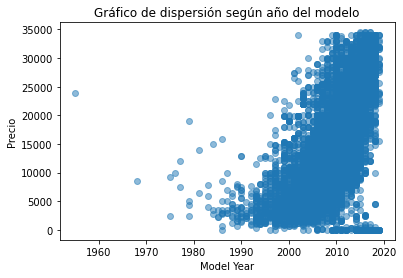

In [131]:
plt.scatter(x=cars_truck_in['model_year'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión según año del modelo')
plt.xlabel('Model Year')
plt.ylabel('Precio')
plt.show



<font color=green>
Observamos lo mismo. Mientras más nuevo el vehículo, el valor tiende a aumentar también.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

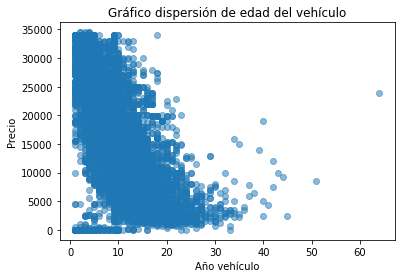

In [132]:
plt.scatter(x=cars_truck_in['car_age'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico dispersión de edad del vehículo')
plt.xlabel('Año vehículo')
plt.ylabel('Precio')
plt.show



<font color=green>
Observamos una correlación parecida en año del vehículo con precio, como a la del Año del modelo con precio
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

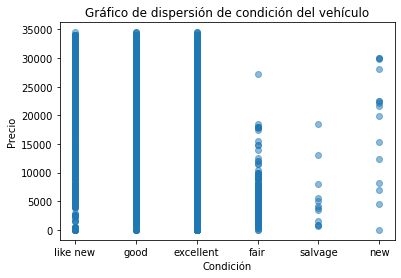

In [133]:
plt.scatter(x=cars_truck_in['condition'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de condición del vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show



<font color=green>
Si bien, los más caros son las mismas categorias de la SUV, la correlación es parecida también.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

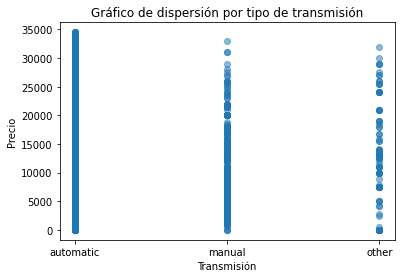

In [134]:
plt.scatter(x=cars_truck_in['transmission'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión por tipo de transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio')
plt.show



<font color=green>
Al igual como en SUV, las versiones automáticas son más caras que los manuales.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

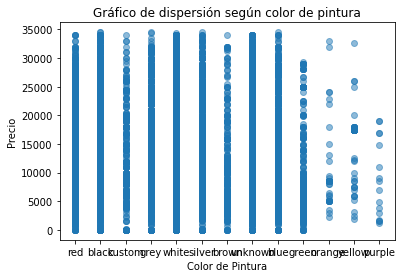

In [135]:
plt.scatter(x=cars_truck_in['paint_color'], y=cars_truck_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión según color de pintura')
plt.xlabel('Color de Pintura')
plt.ylabel('Precio')
plt.show

<font color=green>
En color de pintura tenemos un cambio. Tenemos los mismo desconocidos, pero tenemos más blancos, silver y azules.
</font>

In [136]:
cars_sedan_in = cars_sedan[cars_sedan['price'].isin(cars_price_in['price'])]
len(cars_sedan_in)

12147

In [137]:
cars_sedan_in.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,condition_id,car_age,avg_miles
price,1.000000,0.571188,-0.037693,-0.492362,0.041721,0.001330,0.298803,-0.567738,0.216628
model_year,0.571188,1.000000,-0.147674,-0.486043,0.070028,-0.002987,0.293329,-0.995518,0.423311
cylinders,-0.037693,-0.147674,1.000000,0.057365,0.219249,0.005049,-0.052445,0.147281,-0.057093
odometer,-0.492362,-0.486043,0.057365,1.000000,-0.051227,0.002278,-0.339329,0.483647,0.245604
is_4wd,0.041721,0.070028,0.219249,-0.051227,1.000000,0.005335,0.014877,-0.070012,0.027294
days_listed,0.001330,-0.002987,0.005049,0.002278,0.005335,1.000000,-0.009933,0.004216,0.004216
condition_id,0.298803,0.293329,-0.052445,-0.339329,0.014877,-0.009933,1.000000,-0.290992,0.038933
car_age,-0.567738,-0.995518,0.147281,0.483647,-0.070012,0.004216,-0.290992,1.000000,-0.432498
avg_miles,0.216628,0.423311,-0.057093,0.245604,0.027294,0.004216,0.038933,-0.432498,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

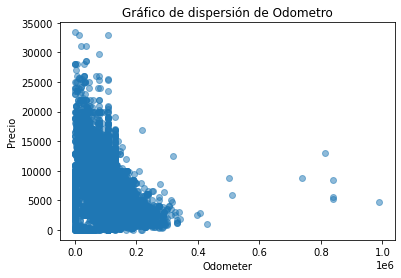

In [138]:
plt.scatter(x=cars_sedan_in['odometer'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de Odometro')
plt.xlabel('Odometer')
plt.ylabel('Precio')
plt.show

<font color=green>
También observamos que mientras menos millaje, más caro el vehículo. La correlación es parecida al de la SUV.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

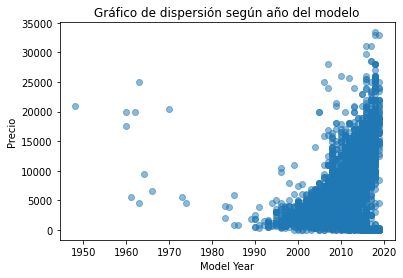

In [139]:
plt.scatter(x=cars_sedan_in['model_year'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión según año del modelo')
plt.xlabel('Model Year')
plt.ylabel('Precio')
plt.show

<font color=green>
La correlación de Sedan es parecida a Truck en tema a año del modelo, y mientras más nuevo, más caro.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

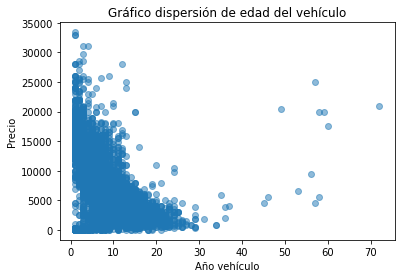

In [140]:
plt.scatter(x=cars_sedan_in['car_age'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico dispersión de edad del vehículo')
plt.xlabel('Año vehículo')
plt.ylabel('Precio')
plt.show

<font color=green>
También vemos una tendencia de mientras más joven el vehículo, más caro (con algunas excepciones), y su correlación esta casí en la mitad de la de SUV y Truck. 
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

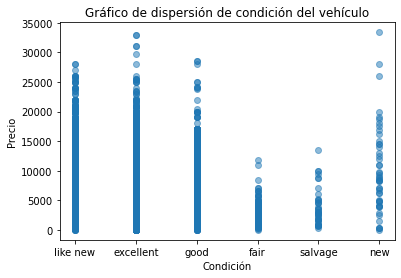

In [141]:
plt.scatter(x=cars_sedan_in['condition'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión de condición del vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show

<font color=green>
Si bien, la cantidad de vehículos con el tipo de condición es diferente, las cantidades que más hay, son los mismos tres, Como nuevo, excelente, y buenos. Y la correlación es parecida a la de los Truck.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

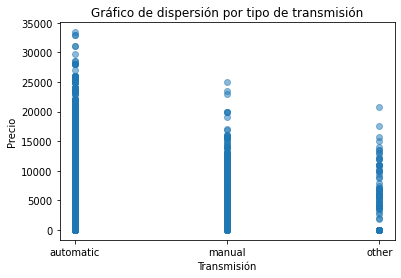

In [142]:
plt.scatter(x=cars_sedan_in['transmission'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión por tipo de transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Precio')
plt.show

<font color=green>
Al igual que los otros dos tipos, los automáticos son los más caros.
</font>

<function matplotlib.pyplot.show(close=None, block=None)>

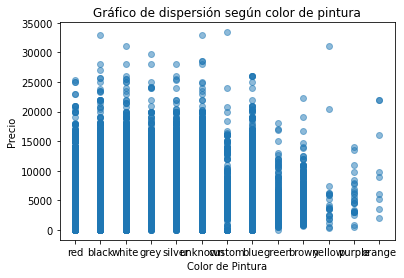

In [143]:
plt.scatter(x=cars_sedan_in['paint_color'], y=cars_sedan_in['price'], alpha=0.5)
plt.title('Gráfico de dispersión según color de pintura')
plt.xlabel('Color de Pintura')
plt.ylabel('Precio')
plt.show

<font color=green>
En colores de los sedan, está un poco más dispersos. El negro, blanco, plateado, azules y los desconocidos son los más caros.
</font>

## Conclusión general

<font color=green>
Con el analisis hecho, podemos llegar a la siguiente conclusión:

- Model_year: Mientras más nuevo auto o mayor su año, más caro es.
- Odometer: Mientras mayor su millaje, más barato es el vehículo.
- Car_age: Mientras más viejo el vehículo, más barato.
    
Las correlaciones de model_year, odometer y car_age se mantienen relativamente constantes en los 3 tipos de vehículos. El valor de estas correlaciones ronda el valor 0.5, con algunos casos siendo levemente mayores.

Pudimos llegar a estas conclusiones al analizar los 3 tipos de vehículos más comunes según el precio que tienen.
    
También pudimos identificar algunos rangos normales para los vehículos publicados. Estos rangos son:

- price: Esta variable tiene un rango normal de 1 a 35000, con la mayor densidad entre los 4000 y 9000. Sobre este rango normal, aumenta lentamente hasta los 70000, para luego aumentar rápidamente y llegar a un máximo de 375000.

- odometer: El rango normal de los odómetros es desde 0 a 251000, con una mayor densidad entre 100000 y 130000 kilómetros. Sobre el rango normal, aumenta lentamente hasta los 400000 kilómetro, para luego aumentar rápidmente y llegar a un máximo de 990000 kilómetros.

- car_age: La edad normal de los autos vendidos es de 1 a 24 años. Con la mayor densidad entre los 4 y 12 años. 

- cylinders: La cantidad de cilindros común (98%) es de 4, 6 o 8 cilindros. Con una minoría teniendo 10, 5, 3 o 12 cilindros. 

- condition: Las condiciones más comunes para los vehículos son: Excellent (48%), Good (39%) y Like new (9%). Entre todas suman un 96% de los datos totales, el resto de los vehículos son en su mayoría nuevos o como nuevos, con una pequeña minoría en estado de salvataje.
    
- paint_color: Se clasifió como unknown todos los colores faltantes, ya que era difícil llegar a saber cuál color correspondiera realmente. Para poder solucionarlo, se tendría que dejar como campo obligatorio al momento de publicar el vehículo. O bien, preguntar el por qué no se llenaron esos campos.    

</font>